## Task 1: Run code from Github1.Clone repository fromhttps://github.com/bonlime/keras-deeplab-v3-plus/blob/master/README.md2.Run the code mentioned in README, get the same result! •You will need to install "opencv" and updated "keras"


In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
#importing keras and opencv
import keras
import cv2

Using TensorFlow backend.


In [3]:
from matplotlib import pyplot as plt
import numpy as np
from model import Deeplabv3

In [4]:
deeplab_model = Deeplabv3()

In [5]:
img = plt.imread("imgs/image1.jpg")

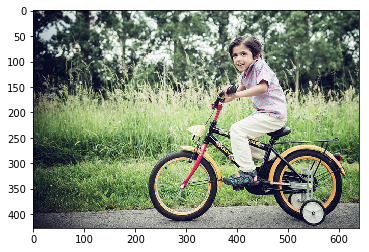

In [6]:
plt.imshow(img)

In [7]:
img.shape

(427, 640, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


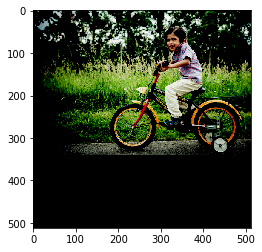

In [8]:
w, h, _ = img.shape
ratio = 512. / np.max([w,h])
resized = cv2.resize(img,(int(ratio*h),int(ratio*w)))
resized = resized / 127.5 - 1.
pad_x = int(512 - resized.shape[0])
resized2 = np.pad(resized,((0,pad_x),(0,0),(0,0)),mode='constant')

plt.imshow(resized2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


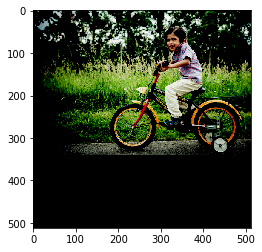

In [9]:
plt.imshow(resized2)

In [10]:
res = deeplab_model.predict(np.expand_dims(resized2,0))

In [11]:
res.shape

(1, 512, 512, 21)

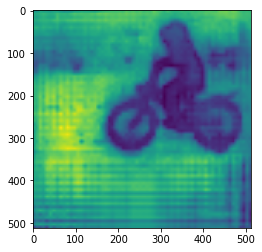

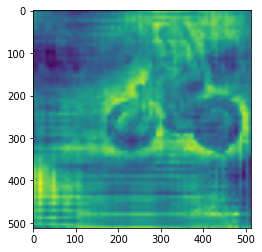

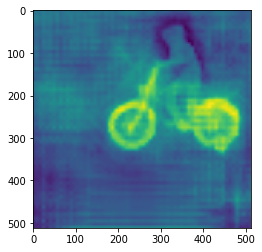

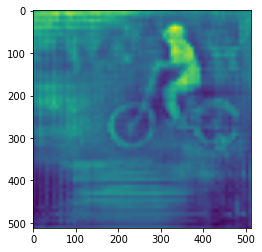

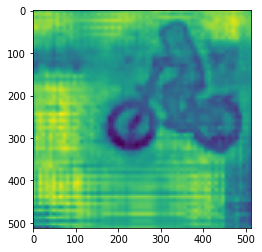

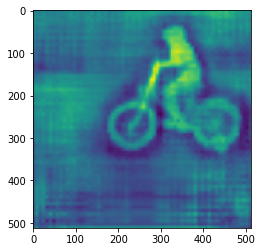

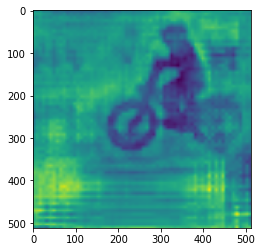

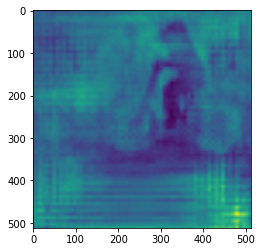

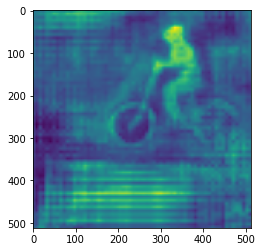

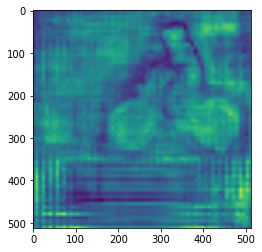

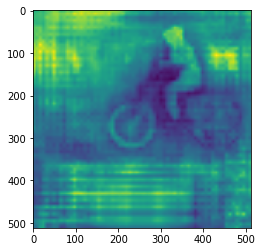

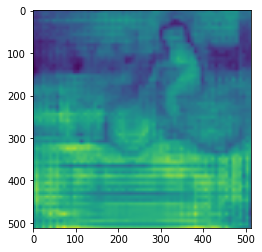

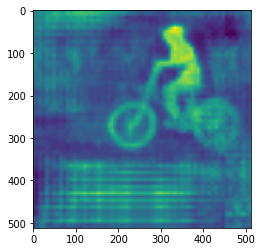

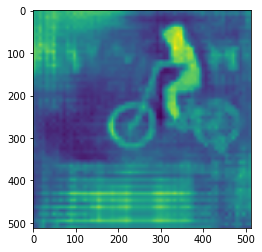

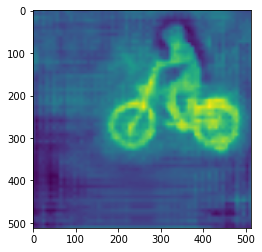

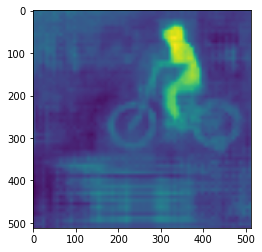

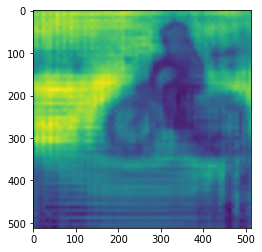

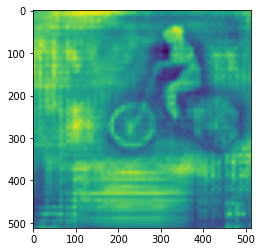

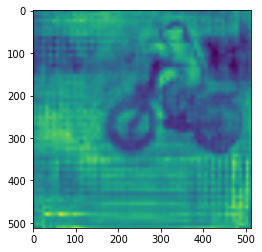

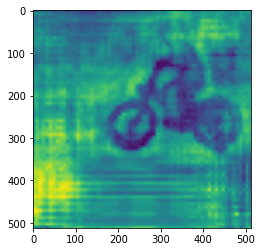

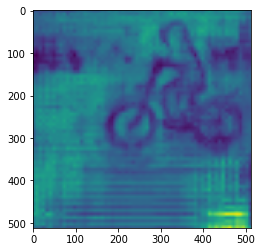

In [12]:
for i in range(21):
    plt.imshow(res[0,:,:,i])
    plt.show()

In [13]:
res.shape

(1, 512, 512, 21)

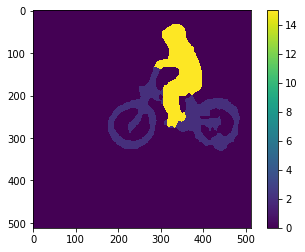

In [14]:
plt.imshow(res.argmax(axis=3)[0])
plt.colorbar()

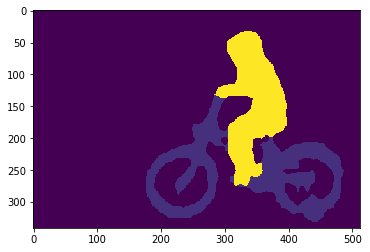

In [15]:
labels = np.argmax(res.squeeze(),-1)
plt.imshow(labels[:-pad_x])

## Task 2: Train the same model yourself


In [16]:
#defining function for resizing images (jpeg images)
def resizer_color_images(img):
    w, h, _ = img.shape
    ratio = 64. / np.max([w,h])
    resized = cv2.resize(img,(int(ratio*h),int(ratio*w)))
    resized = resized / 127.5 - 1.
    pad_x = int(64 - resized.shape[0])
    resized2 = np.pad(resized,((0,pad_x),(0,0),(0,0)),mode='constant')
    #if shape is less than(64,64,3) then using resize to shape img
    if resized2.shape < (64,64,3):
               resized2 = cv2.resize(img, (64,64))
    return resized2

In [22]:
import os
import glob
from PIL import Image

In [47]:
data = []
labels = []
counter = 0


for f_jpeg in glob.iglob("dataset/JPEGImages/*"):
    f_png = f_jpeg.replace("JPEGImages", "SegmentationClass").replace(".jpg", ".png")
    if not os.path.isfile(f_png):
        continue
    
    # jpeg
    new_image = (np.asarray(Image.open(f_jpeg)))
    processed_image = resizer_color_images(new_image)
    data.append(processed_image)

    #png
    new_image = Image.open(f_png)
    np_img = np.array(new_image)
    class_img = np.zeros((np_img.shape[0], np_img.shape[1], 20))
    for i in [c[1] for c in new_image.getcolors()]:
        if i == 255 or i == 0:
            continue
        class_img[:,:,i-1][np_img == i] = 1

    processed_image = cv2.resize(class_img, (64,64))
    labels.append(processed_image)
    
    counter += 1
    #if counter > 100:
        #break
    print(counter, end=", ")

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222

1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720

In [48]:
data = np.array(data)
labels = np.array(labels)
data.shape, labels.shape

((2913, 64, 64, 3), (2913, 64, 64, 20))

In [49]:
deeplab_model = Deeplabv3(input_shape=(64, 64, 3), backbone='xception', classes=20)

In [50]:
deeplab_model.compile(optimizer='rmsprop', loss='mean_absolute_error')

In [51]:
deeplab_model.fit(data, labels, epochs=3, batch_size=10)

Epoch 1/3
2913/2913 [==============================] - 1685s 578ms/step - loss: 0.0833
Epoch 2/3
2913/2913 [==============================] - 1395s 479ms/step - loss: 0.0313
Epoch 3/3
2913/2913 [==============================] - 1380s 474ms/step - loss: 0.0261


In [52]:
mask = deeplab_model.predict(data[2:3])

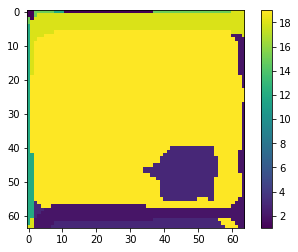

In [53]:
plt.imshow(mask.argmax(axis=3)[0])
plt.colorbar()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


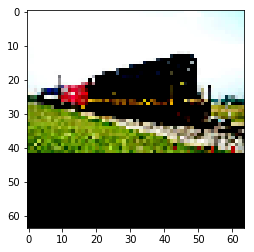

In [54]:
plt.imshow(data[2])